# Исследование продаж компьютерных игр с целью прогнозирования

# План проекта:
[Описание данных](#step0)

[1. Знакомство с данными и общая информация.](#step1)

[2. Подготовка данных:](#step2)
- [приведение столбцов к нижнему регистру](#step2.1)
- [преобразование данных в нужные типы](#step2.2)
- [обработка столбцов с рейтингами](#step2.3)
- [добавление столбца с суммарными продажами в регионах.](#step2.4)

[3. Исследовательский анализ данных.](#step3)
- [анализ игр в разные периоды.](#step3.1)
- [анализ продаж по платформам.](#step3.2)
- [определение актуального периода.](#step3.3)
- [выявление лидеров среди платформ.](#step3.4)
- ["ящик с усами" по глобальным продажам среди топ-платформ.](#step3.5)
- [корреляция между отзывами и продажами.](#step3.6)
- [определение лидеров среди жанров](#step3.7)

[4. Портрет пользователя каждого региона (топ-5 платформ, топ-5 жанров, ESRB).](#step4)
- [регион NA](#step4.1)
- [регион EU](#step4.2)
- [регион JP ](#step4.3)

[5. Проверка гипотез](#step5)
- [гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#step5.1)
- [гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные](#step5.2)

[6. Общий вывод](#step6)

# Описание данных <a id='step0'></a>
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<a id='step1'></a> 
# Знакомство с данными и общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats as st

Ознакомимся с общей информацией о данных, определим проблемные участки, наметим план по предобработке данных:

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, что мы имеем:
- наименование столбцов необходимо привести к нижнему регистру
- **`Name`** - название игры, есть два пропуска - можно оставить как есть (при анализе продаж по ргеионам, например,  название игры нам не принципиально), можно удалить, незначительная потеря,  тип данных соответствует содержанию. 
- **`Platform`** - платформа - пропусков нет, тип данных соответсвует содержанию
- **`Year_of_Release`** - год выпуска - есть пропуски, процент пропусков незначительный, можно удалить строки без вреда для анализа, тип данных float, изменить на целочисленный int.
- **`Genre`** - жанр игры, так же как в первом столбце два пропуска - удаляем.
- **`NA_sales`** - число проданных миллионов копий в Северной Америке, пропусков нет, тип данных соответствует содержанию
- **`EU_sales`** - число проданных миллионов копий в Европе, пропусков нет, тип данных соответствует содержанию 
- **`JP_sales`** - число проданных миллионов копий в Японии, пропусков нет, тип данных соответствует содержанию
- **`Other_sales`** - число проданных миллионов копий в других странах, пропусков нет, тип данных соответствует содержанию
- **`Critic_Score`**  - оценки критиков - более 50% пропусков, возможно игры оценивалась критиками и пользователями только при достижении определнного уровня продаж, то есть при достижении какой-то популярности. Заполнить пропуски не представлется возможным, средним не логично, нулями нельзя - если бы игра оценивалась, то оценка не была бы нулевой, тип данных соответствует содрежанию. 
- **`User_Score`**  - оценки пользователей - около 40% пропусков, аналогично предыдущему пункту Заполнить пропуски не представлется возможным, средним не логично, нулями нельзя - если бы игра оценивалась, то оценка не была бы нулевой. Тип данных object, необходимо проверить, что там кроме числовой оценки могло затесаться.
- **`Rating`** - рейтинг от организации ESRB - тоже около 40% пропусков. 
Возможно игра такая древняя, что тогда еще не было таких рейтингов, или они были не обязательны, не было оценок пользователей и критиков.  Но теоретически возможен еще один вариант если рейтинг не делался, то игра подходит по умолчанию для всех.

# Подготовка данных. <a id='step2'></a>

На предыдущем этапе мы ознакомились с данными и наметили примерно, что необходимо сделать в первую очередь.

- **приведение названий столбцов к нижнему регистру:** <a id='step2.1'></a>

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


- **преобразование данных в нужные типы удаление пропусков:** <a id='step2.2'></a>

In [6]:
#удаление незначительного числа строк с пустыми годами и именами
data = data.dropna(subset=['year_of_release'])
#в столбщце name всего два пропуска, можно удалить
data = data.dropna(subset=['name'])
#год из float в int
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Пропуски в столбцах **`critic_score`**, **`user_score`** - заполнять нулями или средними будет неверным, возможно после анализа, если выявится зависимость между продажами и оценками, то по сумме продаж и можно было бы посчитать какой-то рейтин, а если зависимости будет не сильная, то даже этот сомнительный способ не подойдет. Столбец **`rating`** - как уже отмечала выше, пропуски могут быть из-за того , что возможно игра такая древняя, что тогда еще не было таких рейтингов, или они были не обязательны. Еще можно посмотреть по регионам, возможно, например, в Японии, были какие-то свои рейтинги. Но теоретически возможен еще один вариант если рейтинг не делался, то игра подходит по умолчанию для всех рейтинг "E" - everyone. Однако таким образом можно тоже исказить данные. Поэтому пропуски в числовых рейтингах предлагаю не обрабатывать (если заполнить строковым значением, потом будут проблемы с вычислением числовых характеристик, а если заполнить числами (это может повлиять на корреляцию), а в столбце **`rating`** пропуски можно заполнить строкой **unknown**, чтобы в дальнейшем при группировке по рейтингу игры без рейтинга не выпали из обзора.

In [7]:
data['rating']=data['rating'].fillna('unknown')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


Разберемся с типом данных в **`user_score`**:

- **обработка столбца с рейтингами:** <a id='step2.3'></a>

In [8]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.3       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Как видим, вместе с числовыми оценками есть строки со значением **tbd**, предположиельно to be decided или to be determined, оценка еще не определена, по сути то же самое, что и NaN. Чтобы эти строки не мешали на следующем этапе анализировать информацию в этом столбце заменим на Nan (например, чтобы найти среднюю оценку NaNы на не помешают, а в столбце со строками этого сделать будет нельзя)

In [9]:
#заменим tbd на Nan
data['user_score'] = data['user_score'].replace('tbd',np.nan,regex=True)
data['user_score'] = data['user_score'].astype('float')

In [10]:
data['user_score'].value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
9.6      2
0.6      2
1.9      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


- **добавление с толбца с суммарными продажами во всех регионах:** <a id='step2.4'></a>

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [13]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


# Исследовательский анализ данных. <a id='step3'></a>

- **анализ игр в разные периоды.** <a id='step3.1'></a>

Проверим за какой период имеем информацию:

In [14]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Имеем историю продаж компьютерных игр с 1980 по 2016 год. 
Посмотрим, сколько игр выпускалось в разные года:

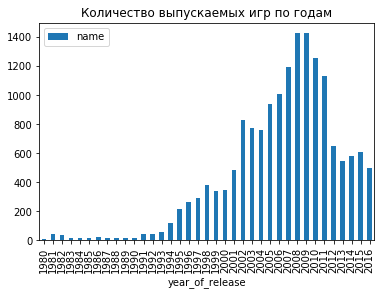

In [15]:
data.pivot_table(index='year_of_release',values='name', aggfunc='count').plot(kind='bar', title='Количество выпускаемых игр по годам')

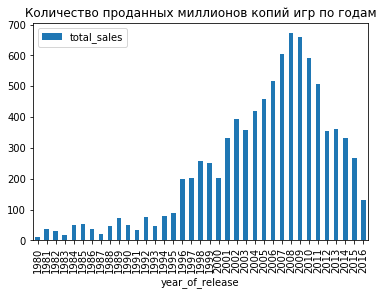

In [16]:
data.pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(kind='bar', title='Количество проданных миллионов копий игр по годам')

И по количеству и по продажам графики примерно одинаковые. Во второй половине 1990-ч гг начался заметный рост числа выупускаемых ежегодно игр и продаж, в 2002 году произошел резкий скачок, и до 2008 года - постоянный рост, пик приходится на 2008-2009 гг, с 2012 года резкое снижение и примерно одинаковое количество игр каждый год  в течение 5 последних лет. В 2016 году продажи игр упали еще больше.

Возможно спад связан с развитием мобильных онлайн-игр.

- **анализ продаж по платформам:** <a id='step3.2'></a>

In [17]:
#функция для сводных таблиц топ-5 платформ, пригодится несколько раз
def top_platform_pivot(sales):
    return data.pivot_table(index='platform',values=sales, aggfunc='sum').sort_values(sales,ascending=False).head()
#функция для сводных таблиц топ-5 жанров, пригодится несколько раз
def genres_pivot(sales):
    return data.pivot_table(index='genre',values = sales, aggfunc=['sum','count','mean','median','std'])
def genres_plot(sales):
    data.pivot_table(index='genre',values=sales, aggfunc='sum').plot(kind='bar', title='Продажи игр, сгрупированные по жанрам')
#функция для свода по рейтингу, пригодится несколько раз
def rating_pivot(sales):
     return data.pivot_table(index='rating',values=sales, aggfunc='sum').sort_values(sales,ascending=False)
#функция визуализация зависимости рейтинг-продажи
def rating_plot(sales):
    return data.pivot_table(index='rating',values=sales, aggfunc='sum').sort_values(sales,ascending=False).plot()


Посмотрим распределение продаж по платформам. Сначала выберем топ платформ по общим продажам копий игр:

In [18]:
top_platform = top_platform_pivot('total_sales')
top_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Посмотрим распределение по годам по топ-5 платформ:


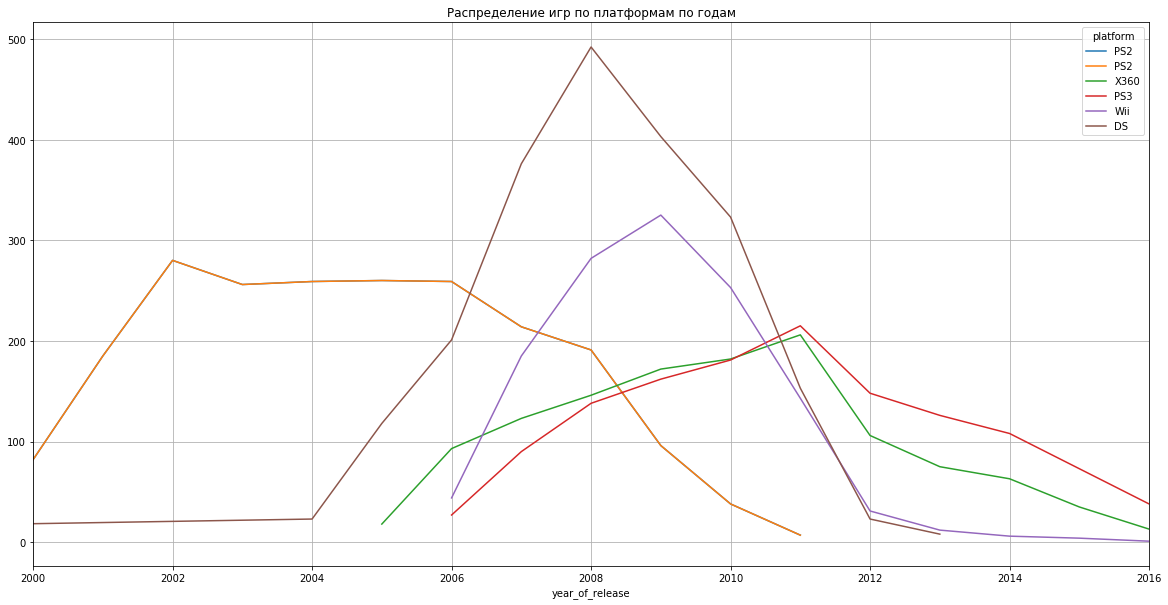

In [19]:
ax=data.query('platform == @top_platform.index[0]').pivot_table(index='year_of_release',columns='platform',values='name',aggfunc='count').plot()
for element in top_platform.index:
    data.query('platform == @element').pivot_table(index='year_of_release',columns='platform',values='name',aggfunc='count').plot(ax=ax,grid=True, title = 'Распределение игр по платформам по годам',figsize=(20, 10),xlim=(2000,2016))
    #

В разные годы игры выпускались на разных платформах: например, с 2000 по 2009 - самой популярной была платформа **PS2**, чуть позже (с 2006 года) начали набирать популярность платформы **X360** и **PS3**, но c 2012 года - они становятся мнее популярными. Примерно этот же период (2006-2010) много игр выпускалось на платформах **Wii**, **DS**. В 2008-2009 был какой-то бум в сфере компьтерных игр похоже - многобразие игр и платформ. И в то же время это переходный период - там пересеклись все платформы, какие-то на пике популярности, какие-то уже сдав свои позиции. В среднем цикл "жизни" платформы составляет около 7-10 лет, пик популярности 2-3 года.

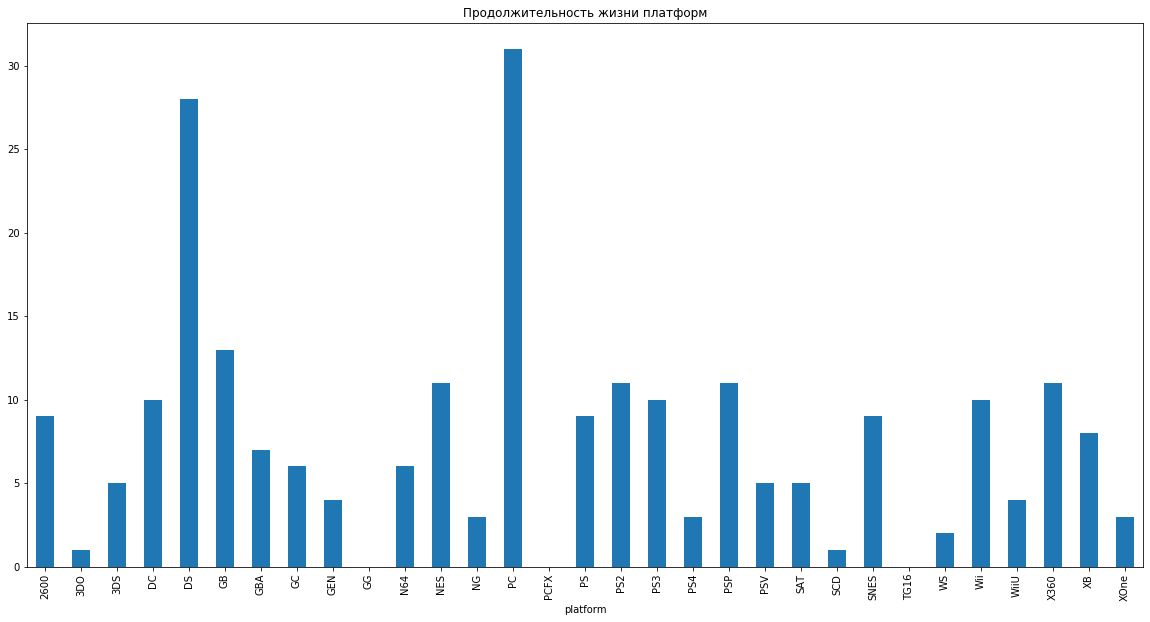

In [20]:
data_pivot = data.pivot_table(index='platform', values='year_of_release',aggfunc=['max','min'])
data_pivot['how many years'] = data_pivot['max']-data_pivot['min']
data_pivot['how many years'].plot(kind='bar',title='Продолжительность жизни платформ',figsize=(20, 10))

In [21]:
data_pivot['how many years'].describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: how many years, dtype: float64

Да так, получается определить период более точно.

А если не по всем, а только по топ-5 платформ:

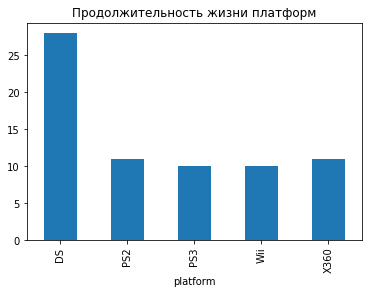

In [22]:
data_pivot = data.query('platform in @top_platform.index').pivot_table(index='platform', values='year_of_release',aggfunc=['max','min'])
data_pivot['how many years'] = data_pivot['max']-data_pivot['min']
data_pivot['how many years'].plot(kind='bar',title='Продолжительность жизни платформ')

In [23]:
data_pivot['how many years'].describe()

count     5.000000
mean     14.000000
std       7.842194
min      10.000000
25%      10.000000
50%      11.000000
75%      11.000000
max      28.000000
Name: how many years, dtype: float64

Опять японцы отличились.

- **определение актуального периода.** <a id='step3.3'></a>

По итогам анализа выяснилось, что средняя продаолжительность продаж по платформам  7,5 лет, медиана - 6 лет, а по топ-платформам - медина 11 лет, выделилась платформа DS - долгожитель. Это платформа была популярна в регионе JP, может быть японский рынок был закрыт для американских и европейских платформ и там хорошо развивалась одна своя, конкурентов нет особо, вообще они странные со своими ролевыми играми и покемонами. Или она была принципиально другая по функционалу и поэтому так выбивается? Нинтендо это которая как планшет? 

In [24]:
data = data.query('year_of_release >=2012')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null int64
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       1312 non-null float64
user_score         1531 non-null float64
rating             2886 non-null object
total_sales        2886 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


- **выявление лидеров среди платформ.** <a id='step3.4'></a>

In [26]:
data.pivot_table(index='platform', columns='year_of_release',values='total_sales', aggfunc='sum')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,NaN,NaN,NaN
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


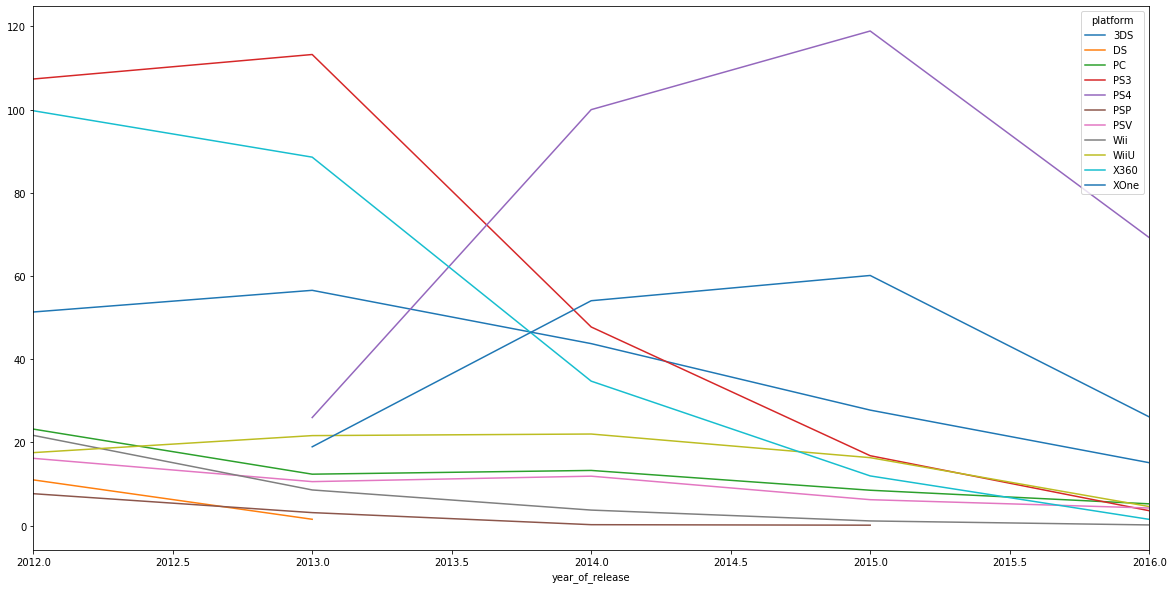

In [27]:
data.pivot_table(index='year_of_release', columns='platform',values='total_sales', aggfunc='sum').plot(figsize=(20, 10))

Итак, нас НЕ интересуют платформы с нисходящим трендом продаж, или продажи по которым совсем прекратились к 2016 году: DC, DS, GBA, GC, PC, PS2, PS3, PSP, Wii, X360, XB, PSV, WiiU - почти все, похоже можно было оставлять все-таки только последние 5 лет. За 10 лет слишком многие платформы уже перестали быть актуальными.

Осталось три платформы - хотя и у них пик продаж уже прошел - 3DS, PS4, XOne, но если опираться на определенный ранее 10тилетний цикл жизни платформы, то PS4, XOne еще должны пару лет протянуть (после 2016 года)

- **"ящик с усами" по глобальным продажам среди топ-платформ** <a id='step3.5'></a> 

Рассмотрим более подробно платформы 3DS, PS4, XOne.

In [28]:
data_top3_platform = data.query('platform == "PS4" or platform == "3DS" or platform == "XOne"')
data_top3_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


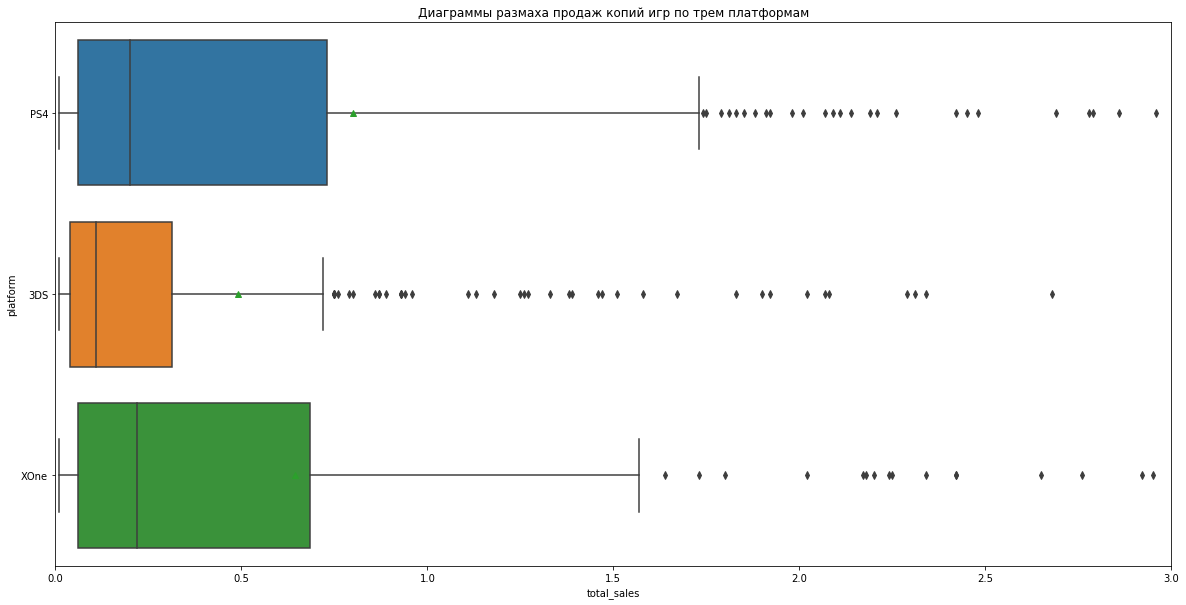

In [29]:
plt.figure(figsize = (20,10))
plt.xlim(0,3)
plt.title('Диаграммы размаха продаж копий игр по трем платформам')
sns.boxplot(x='total_sales', y='platform', data=data_top3_platform,showmeans=True)

In [30]:
data_top3_platform.pivot_table(index='platform', values ='total_sales', aggfunc=['sum','count','mean','median','std'])

,sum,count,mean,median,std
,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,
3DS,194.61,396,0.491439,0.11,1.387161
PS4,314.14,392,0.801378,0.20,1.609456
XOne,159.32,247,0.645020,0.22,1.036139


Диаграммы размаха у PS4 и XOne очень похожи. Каждой игр продавалось в среднем по 200-220 тыс копий, у платформы 3DS чуть меньше - 120 тыс. копий, может быть эта платформа популярна в каком-то одном регионе? Разброс в продаж у всех платформ большой - значит были мегапопулярные игры, которые значительно вырывались по продажам из общей массы игр. По общему количеству проданных копий за анализируемый период лидирует PS4, 3DS на втором месте - но она появилась на 2 года раньше, чем PS4 и XOne, и находится уже на спаде к концу анализируемого периода, поэтому XOne скорее всего ее обгонит по общему количеству проданных копий.

Платформы были популярны в разных регионах - 3DS в основном в Японии, рынок меньше, поэтому глобальные продажи были меньше. Но это становится понятно только на этапе анализа портрета пользователя региона. 
Рынок XBox и PlayStation - примерно одинаковый и больше, чем только японский, поэтому и продажи больше, кроме того DS отличался классом - они были в основном портативные.

- **корреляция между отзывами и продажами** <a id='step3.6'></a> 

Рассмотрим зависимость продаж от отзывов критиков и пользователей на примере платформы PS4 

In [31]:
ps4 = data.query('platform == "PS4"')

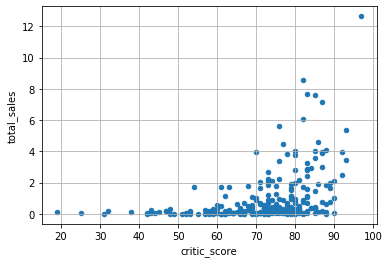

In [32]:
ps4.plot(x='critic_score', y='total_sales', grid=True, kind='scatter',alpha=1)

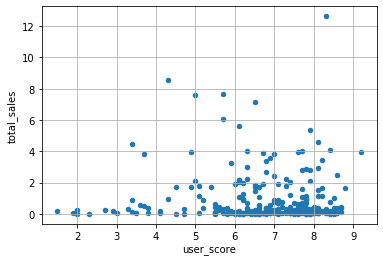

In [33]:
ps4.plot(x='user_score',y='total_sales', grid=True, kind='scatter',alpha=1)

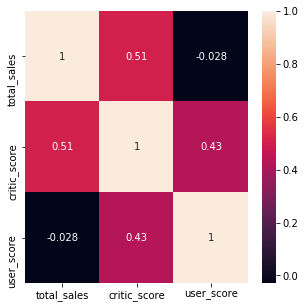

In [34]:
parameters = ps4[['total_sales','critic_score','user_score']]
plt.figure(figsize = (5,5))
sns.heatmap(parameters.corr(method='spearman'),annot=True)


Наблюдается средняя по силе прямая зависимость продаж от оценки критиков: чем больше оценка тем больше продажи. Хотя это спорно, на мой взгляд. Чем больше продажи, тем больше внимания критиков. Часто продажи могут расти благодаря хорошему продвижению, и уже потом подтягиваются специалисты и критики-оценщики. Но и продвижение может состоять в том, чтобы изначально были высокие оценки критиков. Что было раньше: курица или яйцо.

А вот от оценки пользователей продажи, судя по коэффициенту корреляции совсем не зависят.

Платформа XOne:

In [35]:
xone = data.query('platform == "XOne"')

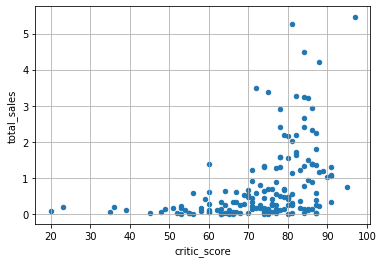

In [36]:
xone.plot(x='critic_score', y='total_sales', grid=True, kind='scatter',alpha=1)

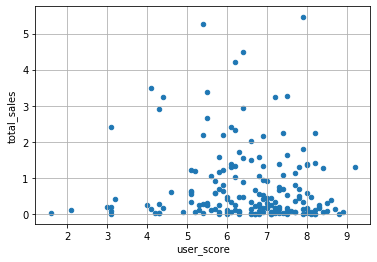

In [37]:
xone.plot(x='user_score',y='total_sales', grid=True, kind='scatter',alpha=1)

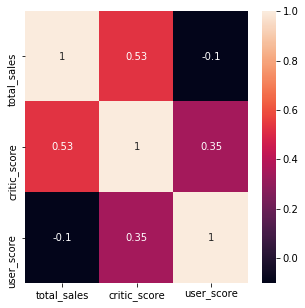

In [38]:
parameters = xone[['total_sales','critic_score','user_score']]
plt.figure(figsize = (5,5))
sns.heatmap(parameters.corr(method='spearman'),annot=True)

Платформа 3DS:

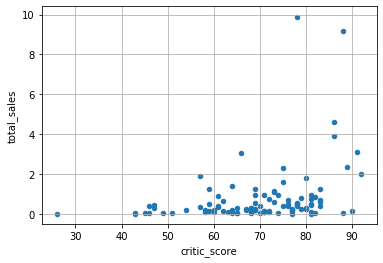

In [39]:
ds = data.query('platform == "3DS"')
ds.plot(x='critic_score', y='total_sales', grid=True, kind='scatter',alpha=1)

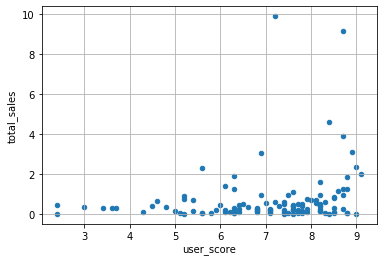

In [40]:
ds.plot(x='user_score',y='total_sales', grid=True, kind='scatter',alpha=1)

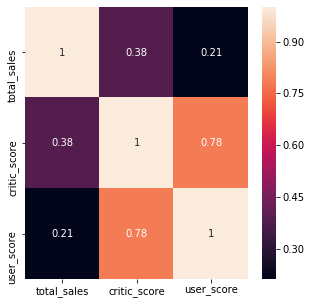

In [41]:
parameters = ds[['total_sales','critic_score','user_score']]
plt.figure(figsize = (5,5))
sns.heatmap(parameters.corr(method='spearman'),annot=True)

Результаты по все трем платформам идентичны:
Наблюдается средняя по силе прямая зависимость продаж от оценки критиков: чем больше оценка тем больше продажи. Хотя это спорно, на мой взгляд. Чем больше продажи, тем больше внимания критиков. Часто продажи могут расти благодаря хорошему продвижению, и уже потом подтягиваются специалисты и критики-оценщики. Но и продвижение может состоять в том, чтобы изначально были высокие оценки критиков. Что было раньше: курица или яйцо.

А вот от оценки пользователей продажи, судя по коэффициенту корреляции совсем не зависят.

- **определение лидеров среди жанров** <a id='step3.7'></a> 

Теперь посмотрим на жанры и найдем самые популярные среди них

In [42]:
genres_pivot('total_sales')

,sum,count,mean,median,std
,total_sales,total_sales,total_sales,total_sales,total_sales
genre,,,,,
Action,441.12,1031,0.427856,0.120,1.166504
Adventure,29.43,302,0.097450,0.030,0.208237
Fighting,44.49,109,0.408165,0.130,0.910385
Misc,85.04,192,0.442917,0.120,1.081047
Platform,61.00,85,0.717647,0.210,1.364413
Puzzle,4.89,28,0.174643,0.045,0.305438
Racing,53.50,115,0.465217,0.140,0.888664
Role-Playing,192.80,370,0.521081,0.140,1.315937


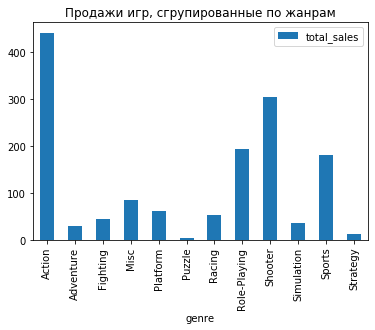

In [43]:
genres_plot('total_sales')

Сильно выделется жанр Action - самое большое количество игр, самое большое количество проданных миллионов копий, каждой игры продается в среднем 170 тыс копий, и выпускается более 200 игр данного жанра (на всех платформах) каждый год - у этого жанра самы большой выбор разных игр.

Sport, Shooter - на втором месте по общему количеству проданных копий. Игр в жанре Shooter меньше в плане разнообразия, зато каждой игры продается по 320 тыс копий в среднем, по этому показателю они лидеры.

Наименее популярные Puzzle и Strategy - это два единственных жанра, где продано менее 100 млн копий игр. И по количеству игр они на последнем месте и по числу проданных копий каждой игры в среднем (по 90 и 80 тыс соответственно).

# Портрет пользователя каждого региона (топ-5 платформ, топ-5 жанров, ESRB <a id='step4'></a> 

Справочно значения рейтингов:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
- «T» («Teen») — «Подросткам 13—19 лет»
- «M» («Mature») — «От 17 лет»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» ( «Rating Pending»») — «Рейтинг ожидается»

- **регион NA** <a id='step4.1'></a> 

In [44]:
top_platform_pivot('na_sales')

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


In [45]:
genres_pivot('na_sales')

,sum,count,mean,median,std
,na_sales,na_sales,na_sales,na_sales,na_sales
genre,,,,,
Action,177.84,1031,0.172493,0.02,0.500780
Adventure,8.92,302,0.029536,0.00,0.084156
Fighting,19.79,109,0.181560,0.05,0.440356
Misc,38.19,192,0.198906,0.01,0.598382
Platform,25.38,85,0.298588,0.09,0.554257
Puzzle,1.13,28,0.040357,0.00,0.106614
Racing,17.22,115,0.149739,0.04,0.352033
Role-Playing,64.00,370,0.172973,0.02,0.503178


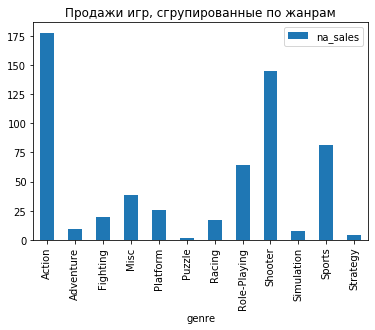

In [46]:
genres_plot('na_sales')

In [47]:
rating_pivot('na_sales')

,na_sales
rating,
M,231.57
E,114.37
unknown,103.31
E10+,75.70
T,66.02


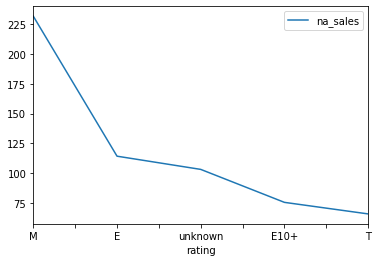

In [48]:
rating_plot('na_sales')

**Портрет пользователя региона NА за анализируемый период (2007-2016):**
- "любимая" платорма X360 (хотя стоит учесть что некоторые платформы вышли позже и еще не успели набрать популярность, а может быть как раз в последующие годы стоит сделать ставку как раз на них)
- предпочитает игры жанра Action, Shooter, Sports
- по продажам лидируют игры с рейтингом Е (что логично, игры с таким рейтингом может купить и дядька и 10 летка, тогда как игры с другими ретингами ограничены возрастным диапазоном)

- **регион EU** <a id='step4.2'></a> 

In [49]:
top_platform_pivot('eu_sales')

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


In [50]:
genres_pivot('eu_sales')

,sum,count,mean,median,std
,eu_sales,eu_sales,eu_sales,eu_sales,eu_sales
genre,,,,,
Action,159.34,1031,0.154549,0.020,0.498182
Adventure,9.46,302,0.031325,0.000,0.098609
Fighting,10.79,109,0.098991,0.020,0.201641
Misc,26.32,192,0.137083,0.015,0.376160
Platform,21.41,85,0.251882,0.080,0.427873
Puzzle,1.40,28,0.050000,0.010,0.118977
Racing,27.29,115,0.237304,0.090,0.384460
Role-Playing,48.53,370,0.131162,0.010,0.407615


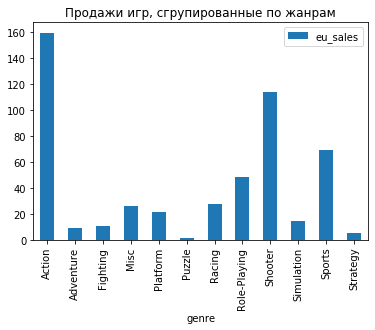

In [51]:
genres_plot('eu_sales')

In [52]:
rating_pivot('eu_sales')

,eu_sales
rating,
M,193.96
E,113.03
unknown,91.50
E10+,55.37
T,52.96


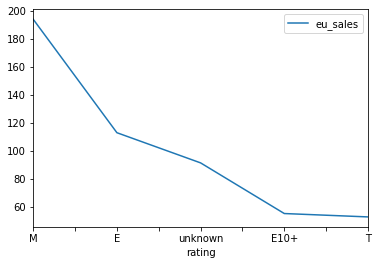

In [53]:
rating_plot('eu_sales')

**Портрет пользователя региона EU за анализируемый период (2007-2016):**
- "любимая" платорма PS3 (но эта платформа прошла уж свой пик и ее жизненный цикл подходит к концу, а например PS4, более поздняя - еще на пике)
- предпочитает игры жанра Action, Shooter, Sports
- по продажам также лидируют игры с рейтингом Е (что логично, игры с таким рейтингом может купить и дядька и 10 летка, тогда как игры с другими ретингами ограничены возрастным диапазоном)

- **регион JP** <a id='step4.3'></a> 

In [54]:
top_platform_pivot('jp_sales')

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


In [55]:
genres_pivot('jp_sales')

,sum,count,mean,median,std
,jp_sales,jp_sales,jp_sales,jp_sales,jp_sales
genre,,,,,
Action,52.80,1031,0.051212,0.01,0.151925
Adventure,8.24,302,0.027285,0.01,0.058445
Fighting,9.44,109,0.086606,0.03,0.251916
Misc,12.86,192,0.066979,0.02,0.140423
Platform,8.63,85,0.101529,0.00,0.335036
Puzzle,2.14,28,0.076429,0.00,0.150141
Racing,2.50,115,0.021739,0.00,0.124719
Role-Playing,65.44,370,0.176865,0.06,0.479818


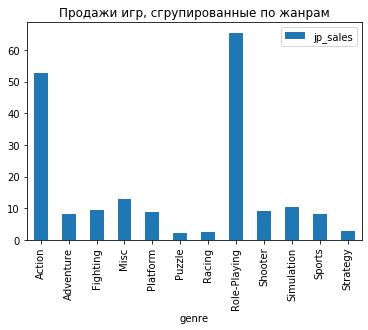

In [56]:
genres_plot('jp_sales')

In [57]:
rating_pivot('jp_sales')

,jp_sales
rating,
unknown,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


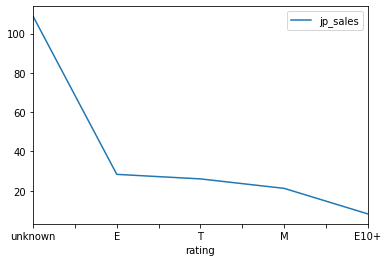

In [58]:
rating_plot('jp_sales')

**Портрет пользователя региона JP за анализируемый период (2007-2016):**

Японцы отличиаются от американцев и европейцев.
- "любимая" платорма DS и DS3 - это Nintendo? К сожалению не разбираюсь в этой теме.
- предпочитает игры жанра Role-Playing
- большинство игр без рейтинга ESRB, возможно этот рейтинг не является обязательным в Японии.

**Пользователи из разных регионов отличаются, популярны разные платформы, особенно выделяется Япония - с популярным жанром - Role-Playing. Соответственно при планировании продаж, подборе ассортимента игр и при разработке стратегии рекламных кампаний нужно ориентироваться на регион.**

# Проверка гипотез <a id='step5'></a> 

- **гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые** <a id='step5.1'></a> 

Это двусторонняя гипотеза о равенстве средних двух совокупностей. Нулевая и альтернативная гипотезы (нулевая всегда равенство): 
- H0 - средние пользовательские рейтинги платформ Xbox One и PC равны
- Н1 - средние пользовательские рейтинги платформ Xbox One и PC не равны

Пороговой значение установим 5%, для данной задачи этого будет достаточно.
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [59]:
#совокупность 1 платформа Xbox One
xbox = data.query('platform =="XOne"')['user_score'].dropna()
#совокупность 2 с ежемесячными выручками пользователей тарифа Ультра:
pc = data.query('platform =="PC"')['user_score'].dropna()
results = st.ttest_ind(xbox,pc)
results.pvalue

0.5535080500643661

P-value выше порогового значения, значит мы не можем отбросить нулевую гипотезу о равенстве средних и есть вероятность, что они не одинаковые. Таким образом, мы не отвергаем нашу 1 "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

In [60]:
np.var(xbox)

1.8965188383045526

In [61]:
np.var(pc)

2.7569952398906588

- **гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные** <a id='step5.2'></a> 

Аналогично поступим с гипотезой 2.

Это двусторонняя гипотеза о равенстве средних двух совокупностей. Нулевая и альтернативная гипотезы (нулевая всегда равенство): 
- H0 - средние пользовательские рейтинги жанров Action и Sports равны
- Н1 - средние пользовательские рейтинги жанров Action и Sports не равны

Пороговой значение установим 5%, для данной задачи этого будет достаточно.

In [62]:
#совокупность 1 платформа Xbox One
action = data.query('genre =="Action"')['user_score'].dropna()
#совокупность 2 с ежемесячными выручками пользователей тарифа Ультра:
sports = data.query('genre =="Sports"')['user_score'].dropna()
results = st.ttest_ind(action,sports)
results.pvalue

3.7163089460934874e-26

Значение p_value значительно меньше порогового значения - отвергаем нулевую гипотезу о равенсте средних жанров Action и Sports. Значит наша гипотеза 2 "Средние пользовательские рейтинги жанров Action и Sports разные" подтвержадется.

In [63]:
np.var(action)

1.8854720340439224

In [64]:
np.var(sports)

3.0073882971729127

# Общий вывод <a id='step6'></a> 

1. Рынок компьютерных игр развивается очень быстро. Нужно обратить внимание на новые серии платформ, которые в этом анализе имеют не самые большие продажи в совокупности, но показывают хороший тренд роста продаж, например, в нашем наборе данных это PS4, XBox One. Однако делать ставку только на новинки не стоит - замена старых платформ на новые происхоит не одномоментно, в среднем консоль живет на рынке компьютерных игр +/- 10 лет.
2. Предпочтения у пользователей разных регионов разные: при разработке рекламных кампаний нужно это учесть и предлагать игры и консоли в зависимости от региона. Особенно отличаются жители Японии - и по предпочтению консоли и по жанрам игр.
3. Анализ показал наличие средней прямой зависимости между оценками критиков и продажами. Поэтому стоит обратить внимание в первую очередь на игры с высокими рейтингами.
4. Основную долю в ассортименте интернет-магазина должны составлять игры с категорией E (для всех) - данные игры имеют наибольшее количество продаж по всем регионам.